In [3]:
using DIVAnd
using PyPlot
using Statistics
using Pkg

In [4]:
Pkg.status()

    Status `~/.julia/environments/v1.2/Project.toml`
  [c9ce4bd3] ArchGDAL v0.2.1
  [8f4d0f93] Conda v1.3.0
  [efc8151c] DIVAnd v2.4.0+ #JMB (https://github.com/gher-ulg/DIVAnd.jl.git)
  [5752ebe1] GMT v0.11.0
  [7073ff75] IJulia v1.20.0
  [86fae568] ImageView v0.9.0
  [85f8d34a] NCDatasets v0.9.2
  [438e738f] PyCall v1.91.2
  [d330b81b] PyPlot v2.8.1


## 1. Data at different locations, 1 dimension
The real coordinates are stored in `x`.      
The new coordinates representing the variables, are stored in `y`.
### 1.1 Classical analysis 

In [113]:
x = [20., 50., 70.];
y = [1., 2., 3.];
f = [0.1, 0.5, 0.7];
xi,yi = ndgrid(range(1,stop=99,length=99),range(1,stop=3,length=3));
mask = trues(size(xi));
pm = ones(size(xi)) / (xi[2,1]-xi[1,1]);
pn = ones(size(xi)) / (yi[1,2]-yi[1,1]);
# correlation length
len = (200.,0.);
# obs. error variance normalized by the background error variance
epsilon2 = 0.01;
# fi is the interpolated field
fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x,y),f .- mean(f),len,epsilon2);

There is no constrain on the sum:

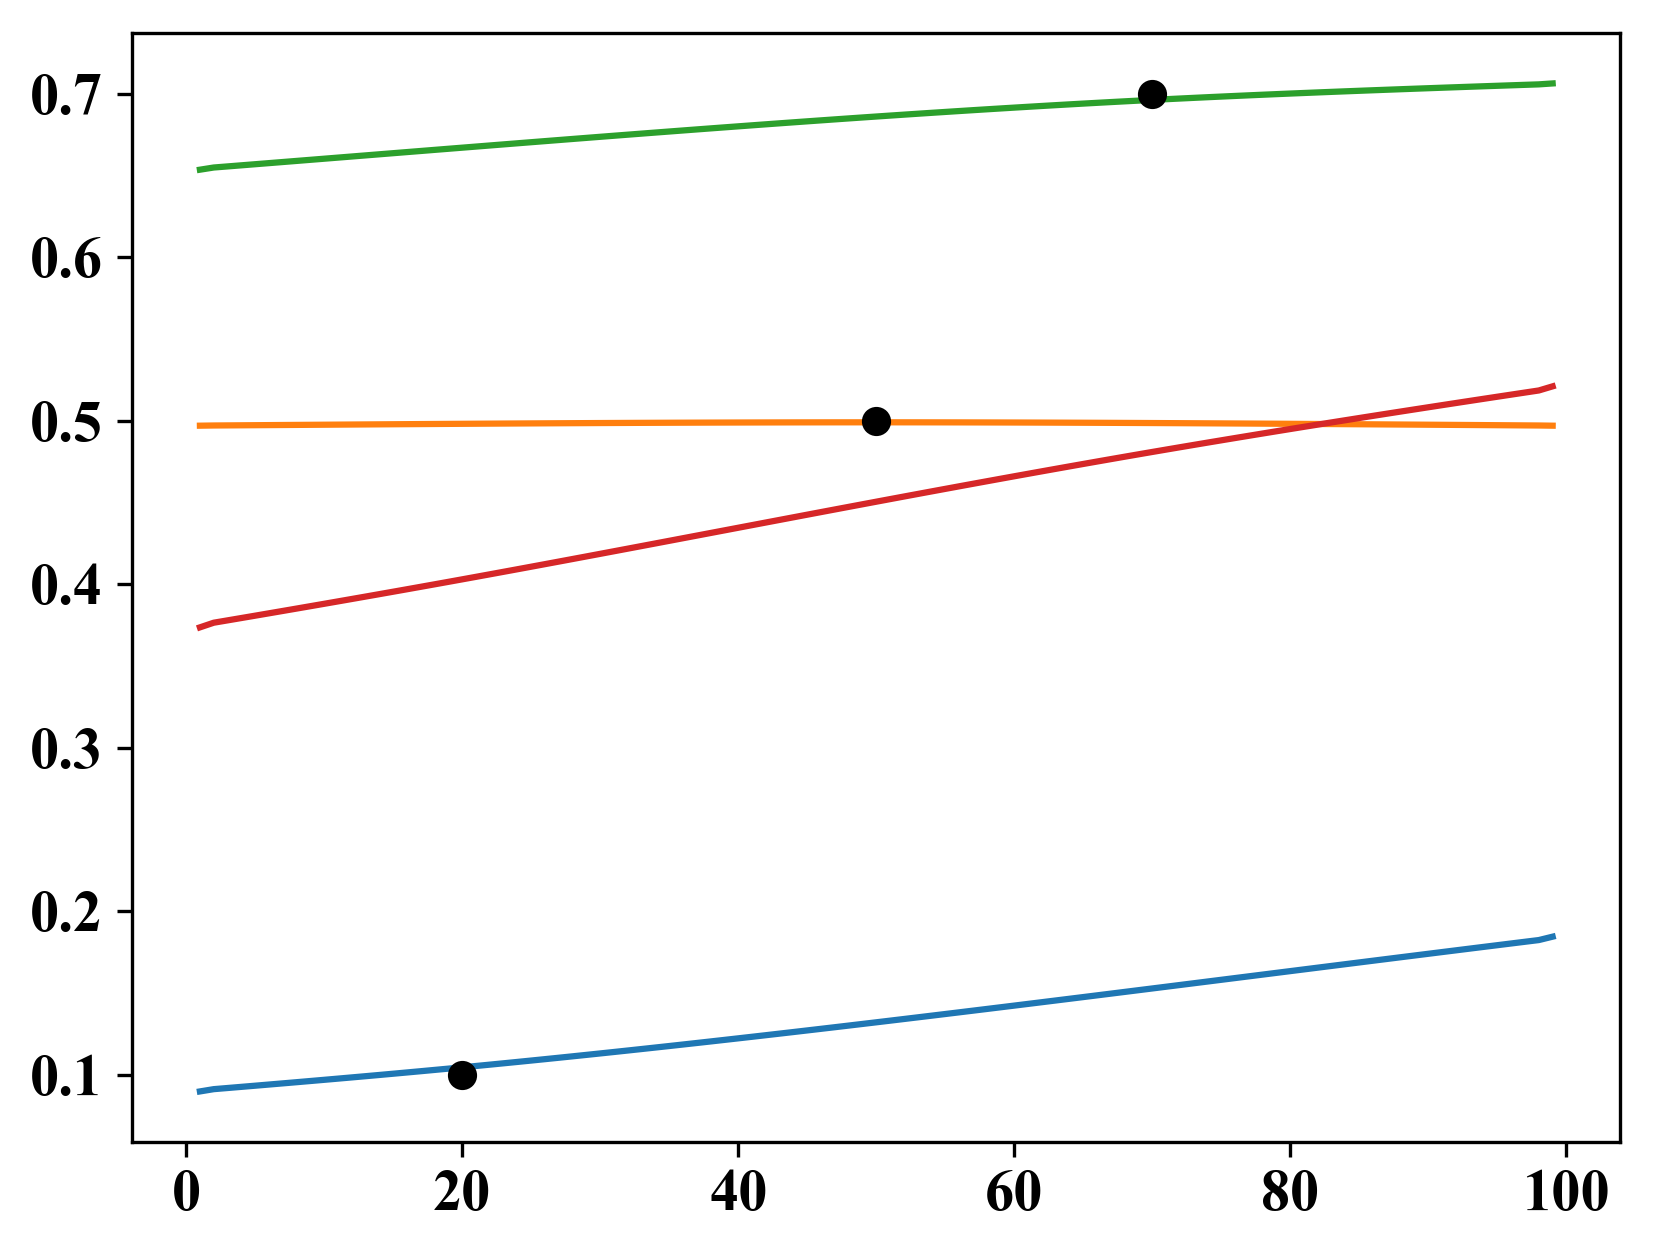

In [114]:
plot(xi[:,1],fi[:,1] .+ mean(f), 
     xi[:,2],fi[:,2] .+ mean(f), 
     xi[:,3],fi[:,3] .+ mean(f), 
     xi[:,3], sum(fi,dims=2) .+ mean(f) )
plot(x, f, "ko")
PyPlot.show()

### 1.2 Analysis with a constrain on the ∑
Just add the `epsilon2forfractions` option.

In [115]:
fic,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x,y),f,len,epsilon2; epsilon2forfractions=0.10);

Let's check again the interpolated fields and their sum:

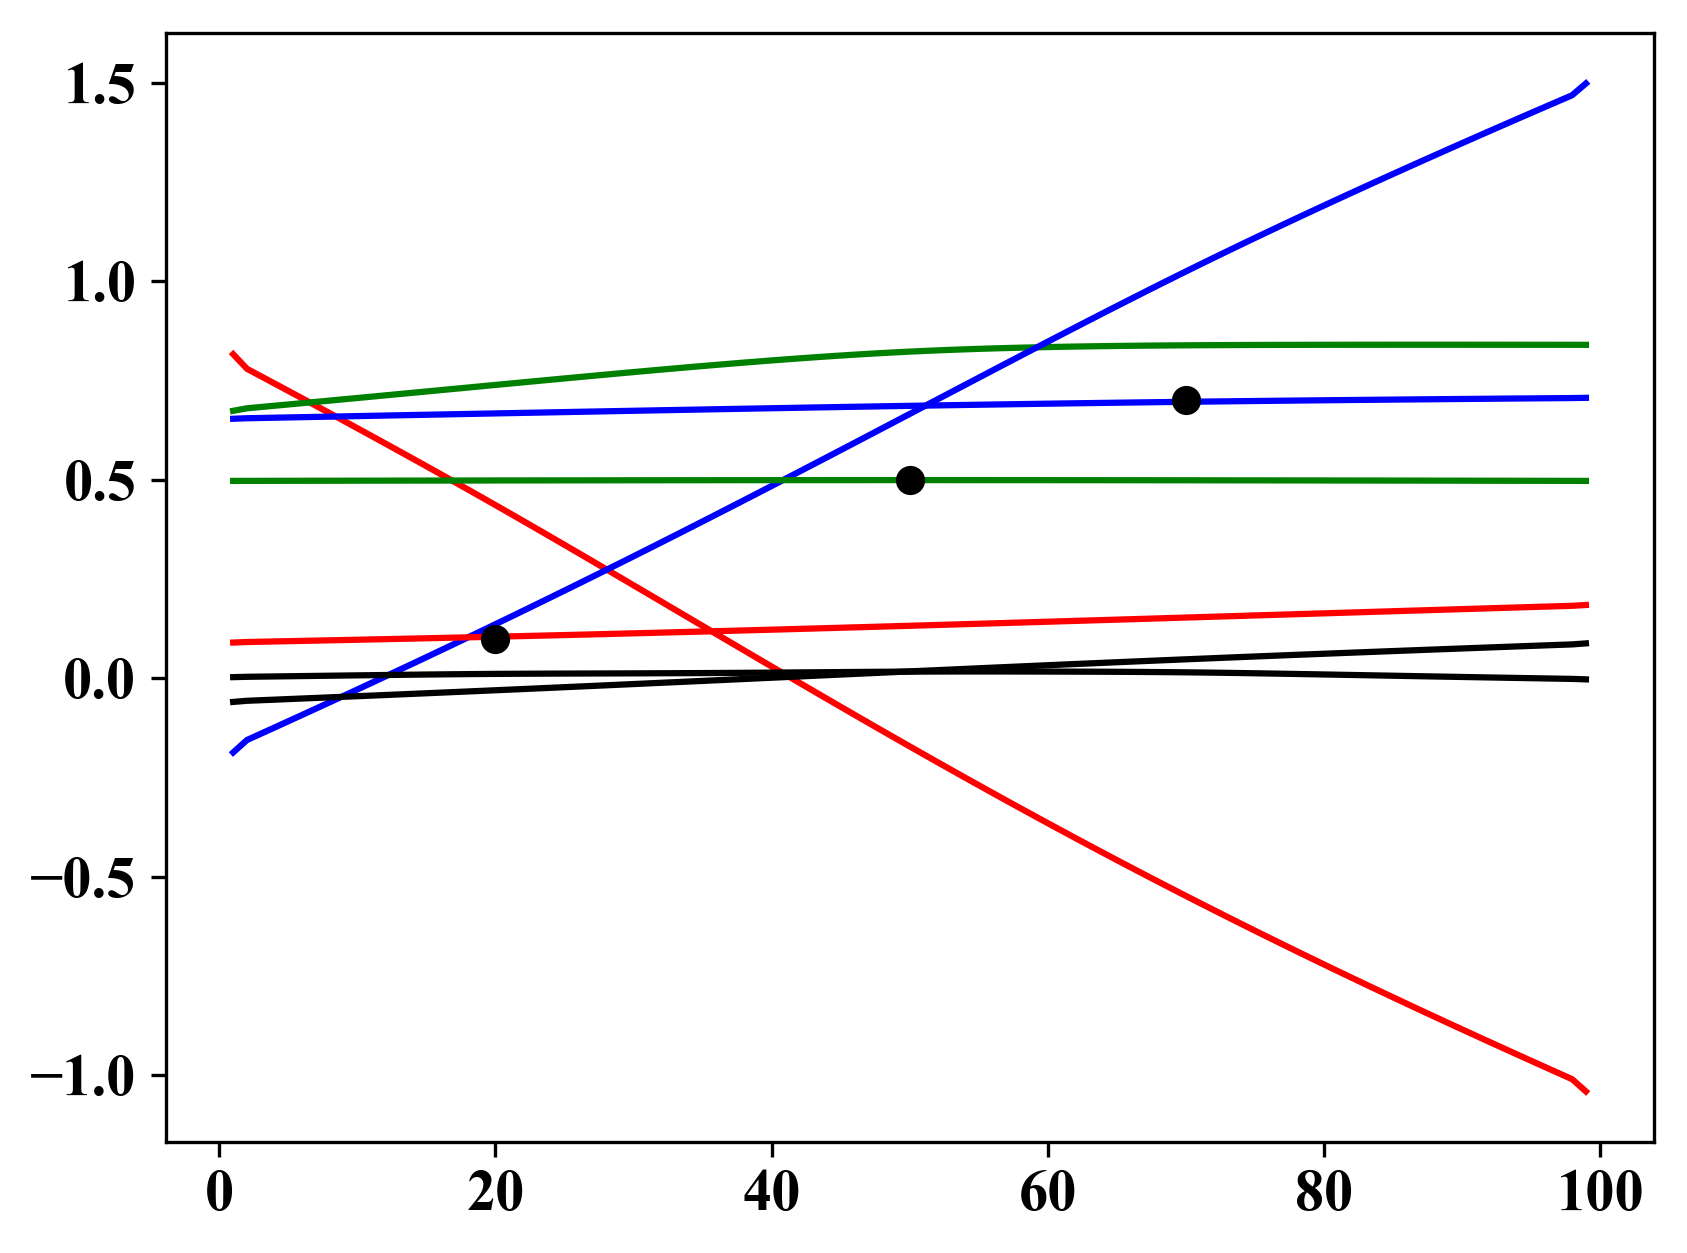

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa1e10da190>

In [116]:
plot(xi[:,1],fic[:,1].+ mean(f), color="r")
plot(xi[:,2],fic[:,2].+ mean(f), color="g")
plot(xi[:,3],fic[:,3].+ mean(f), color="b")
plot(xi[:,3],sum(fic,dims=2), color="k")
plot(xi[:,1],fi[:,1] .+ mean(f), color="r")
plot(xi[:,2],fi[:,2] .+ mean(f), color="g")
plot(xi[:,3],fi[:,3] .+ mean(f), color="b")
plot(xi[:,3], sum(fi,dims=2), color="k")
plot(x, f, "ko")

## 2. Data at the same locations, 1 dimension
Now for each position, we have 3 measurements (one for each sediment fraction), and their sum is set to be 1.

In [117]:
Nfrac = 3
x2 = repeat(x, 1, Nfrac)'[:];
y2 = repeat(y, Nfrac);
# Create random fields
f1 = rand(Float64, 3) * .3
f2 = rand(Float64, 3) * .54
f3 = 1 .- f2 - f1
f123 = hcat(f1 .- mean(f1), f2 .- mean(f2), f3 .- mean(f3))'[:];
f123

9-element Array{Float64,1}:
  0.04331185348436084 
  0.004127733222563185
 -0.04743958670692405 
  0.08047468345653075 
  0.08671926651217632 
 -0.16719394996870707 
 -0.12378653694089159 
 -0.09084699973473946 
  0.21463353667563112 

### 2.1 Classical analysis

In [128]:
mask = trues(size(xi));
fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x2,y2),f123,len,epsilon2);

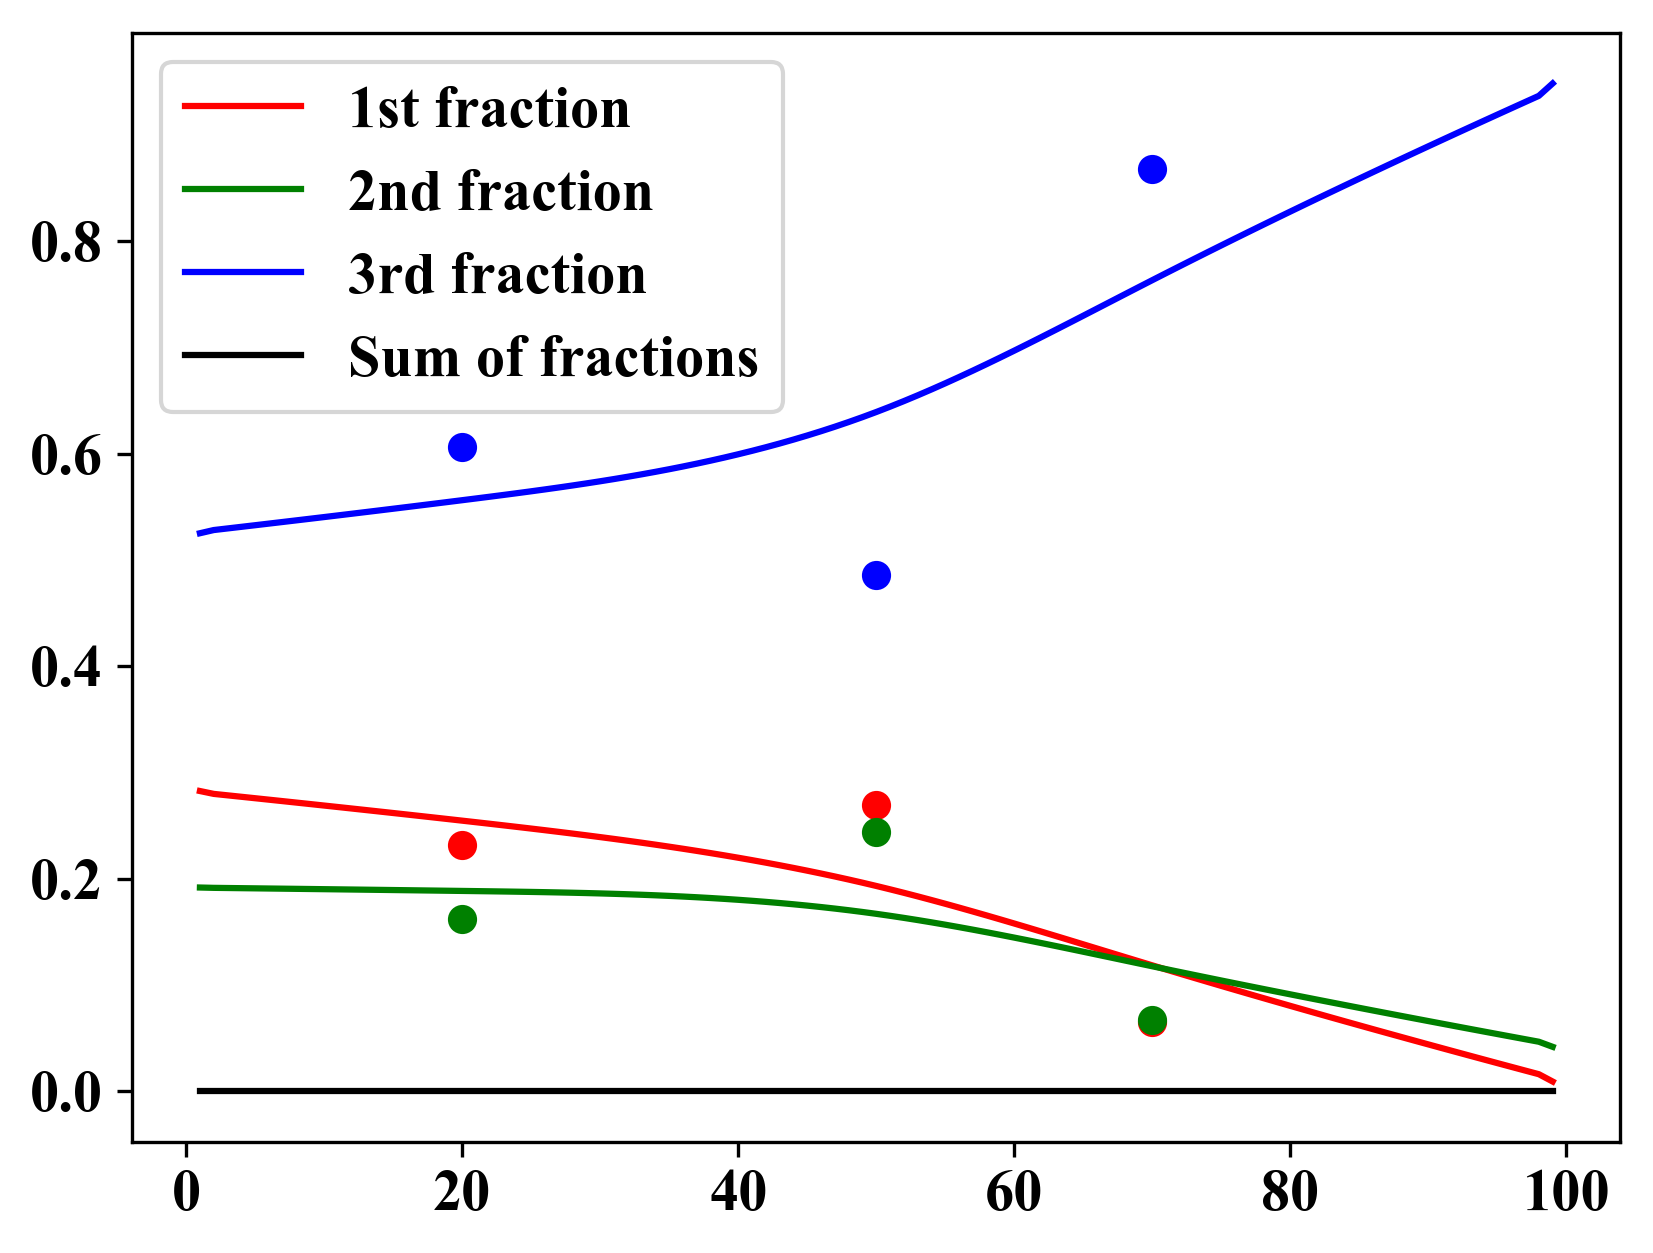

In [121]:
plot(xi[:,1],fi[:,1].+ mean(f1), color="r", label="1st fraction")
plot(xi[:,2],fi[:,2].+ mean(f2), color="g", label="2nd fraction")
plot(xi[:,3],fi[:,3].+ mean(f3), color="b", label="3rd fraction")
plot(xi[:,3], sum(fi,dims=2), "k", label="Sum of fractions")
plot(x2[1:3:end], f123[1:3:end].+ mean(f1), "ro")
plot(x2[2:3:end], f123[2:3:end].+ mean(f2), "go")
plot(x2[3:3:end], f123[3:3:end].+ mean(f3), "bo")
PyPlot.legend()
PyPlot.show()

### 2.2 Analysis with constrain

In [139]:
fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x2,y2),f123,len,epsilon2);
fic2,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x2,y2),f123,len,epsilon2; epsilon2forfractions=0.0001);

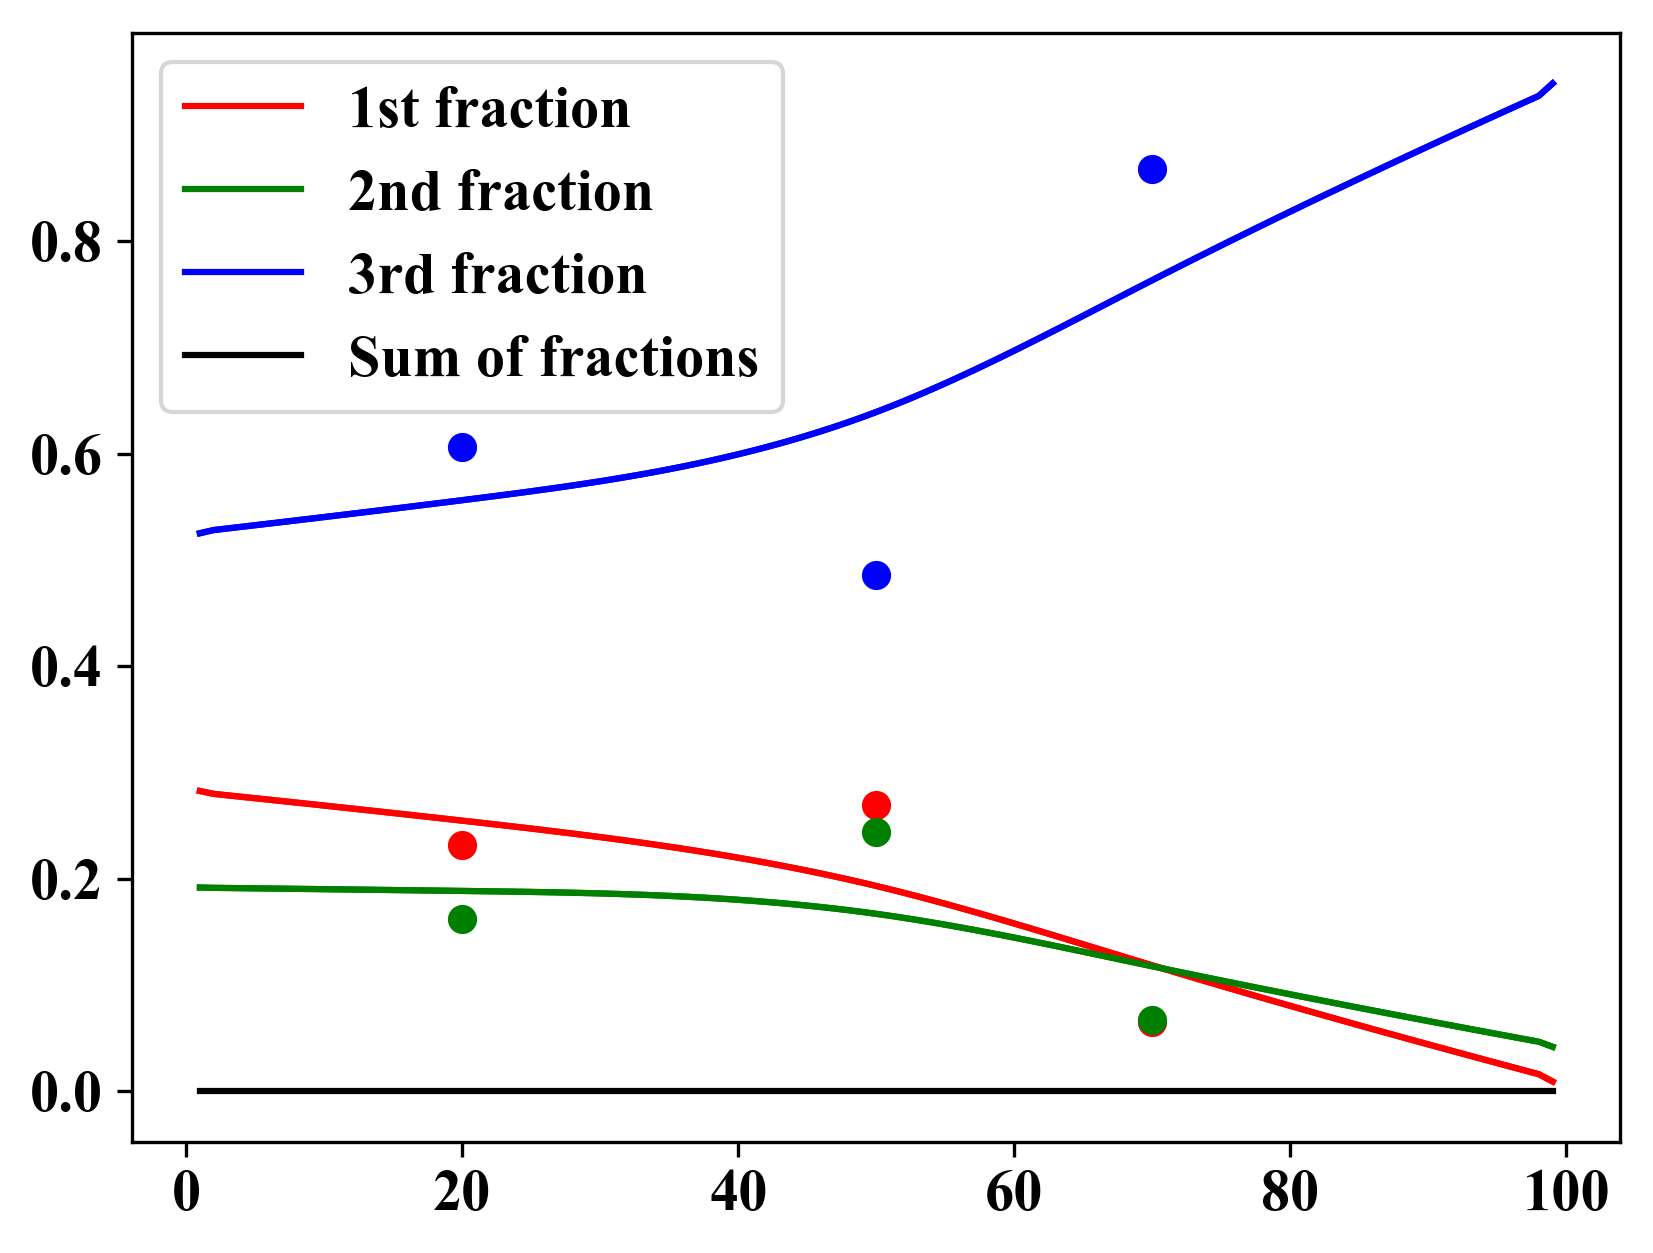

In [140]:
plot(xi[:,1],fic2[:,1].+ mean(f1), color="r", label="1st fraction")
plot(xi[:,2],fic2[:,2].+ mean(f2), color="g", label="2nd fraction")
plot(xi[:,3],fic2[:,3].+ mean(f3), color="b", label="3rd fraction")
plot(xi[:,1],fi[:,1].+ mean(f1), color="r")
plot(xi[:,2],fi[:,2].+ mean(f2), color="g")
plot(xi[:,3],fi[:,3].+ mean(f3), color="b")
plot(xi[:,3], sum(fi,dims=2), "k", label="Sum of fractions")
plot(x2[1:3:end], f123[1:3:end].+ mean(f1), "ro")
plot(x2[2:3:end], f123[2:3:end].+ mean(f2), "go")
plot(x2[3:3:end], f123[3:3:end].+ mean(f3), "bo")
PyPlot.legend()
PyPlot.show()

# 2D case

We create random coordinates `(x, y)` and assign 3 pseudo-observations to each point.

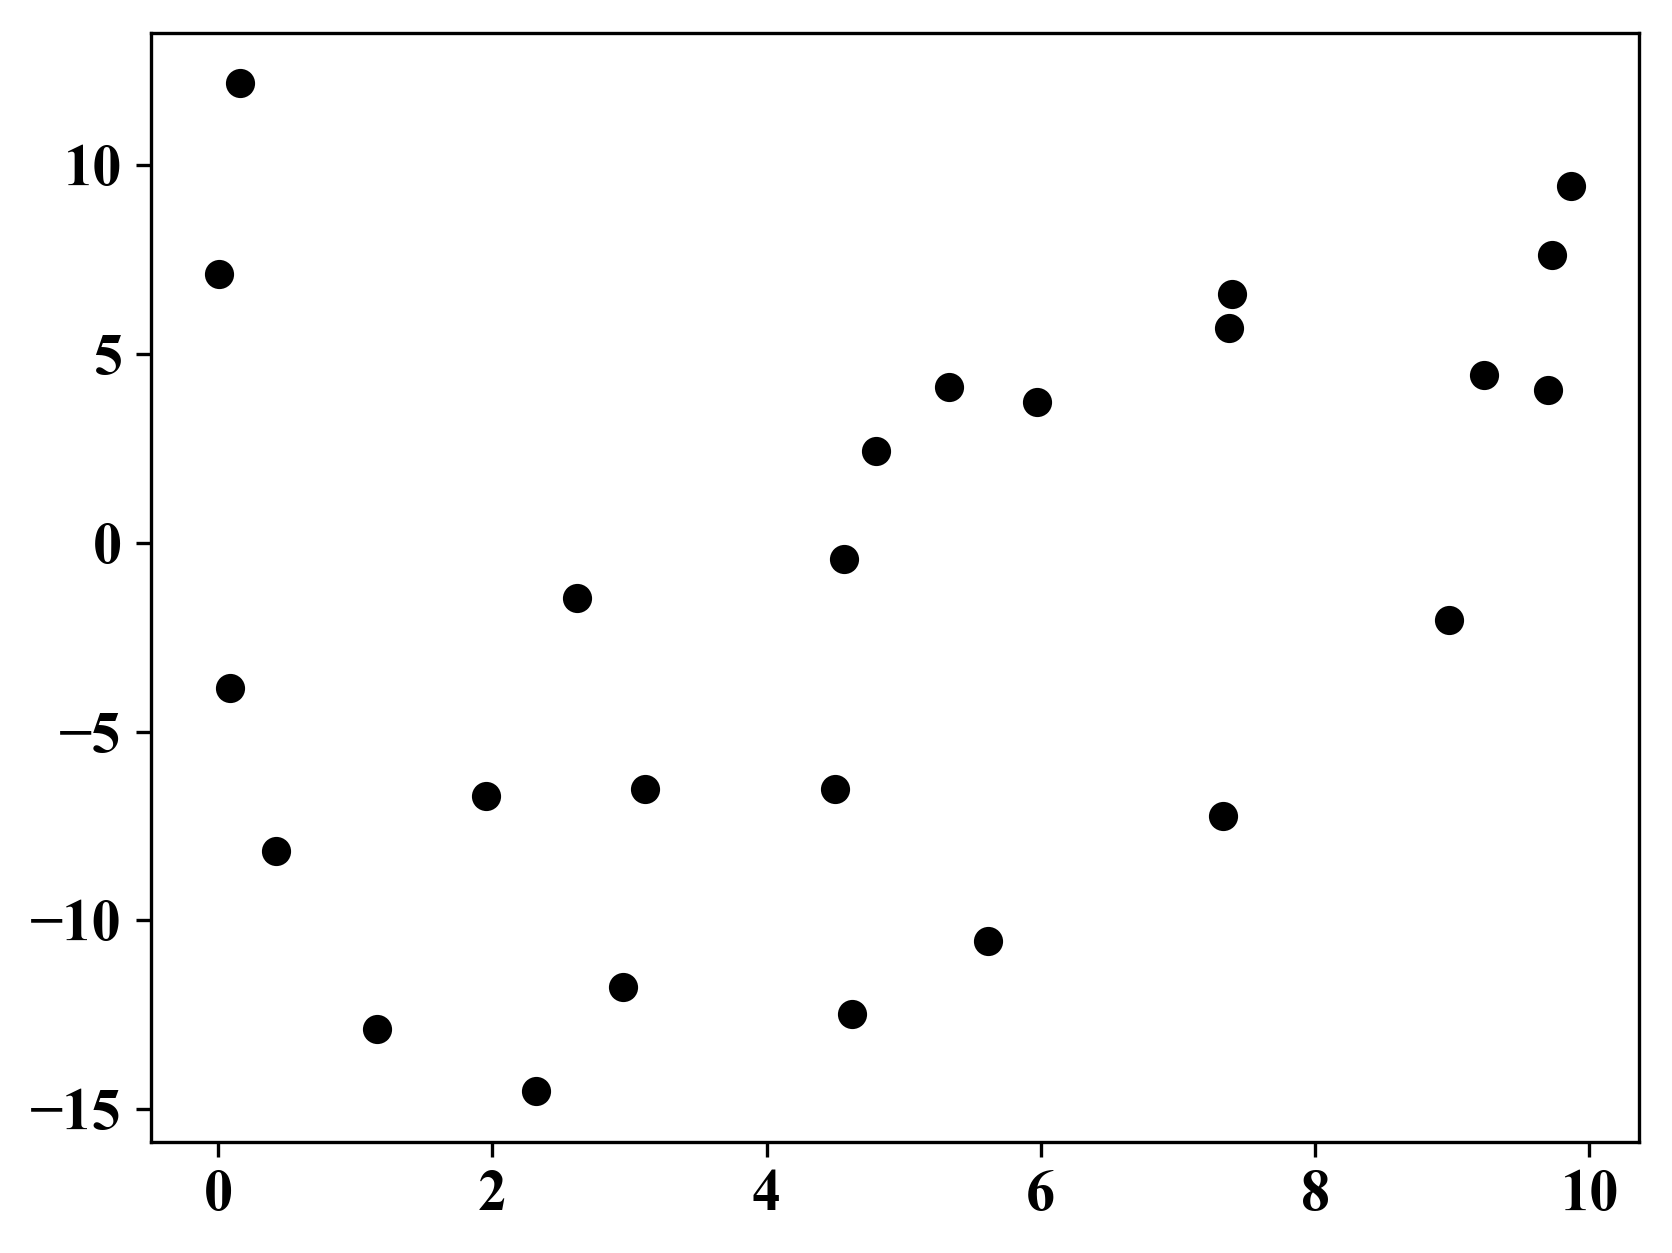

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa1e1059b50>

In [141]:
Npoints = 25;
xx = rand(Float64, Npoints) * 10
yy = (rand(Float64, Npoints).-0.5) * 30
PyPlot.plot(xx, yy, "ko")

In [142]:
xx2 = repeat(xx, 1, 3)'[:];
yy2 = repeat(yy, 1, 3)'[:];
zz2 = repeat([1, 2, 3], Npoints);

In [143]:
field1 = rand(Float64, Npoints) * .2 
field2 = rand(Float64, Npoints) * .6
field3 = 1 .- field2 - field1;
field123 = hcat(field1 .- mean(field1), field2 .- mean(field2), field3 .- mean(field3))'[:];

In [168]:
# Create the new grid
xxi, yyi, zzi = ndgrid(range(0.,step=1.,stop=10.),
                       range(-15.,step=0.5,stop=15.),
                       range(1.,stop=3.,step=1));

We check that the sum of the 3 fractions gives one:

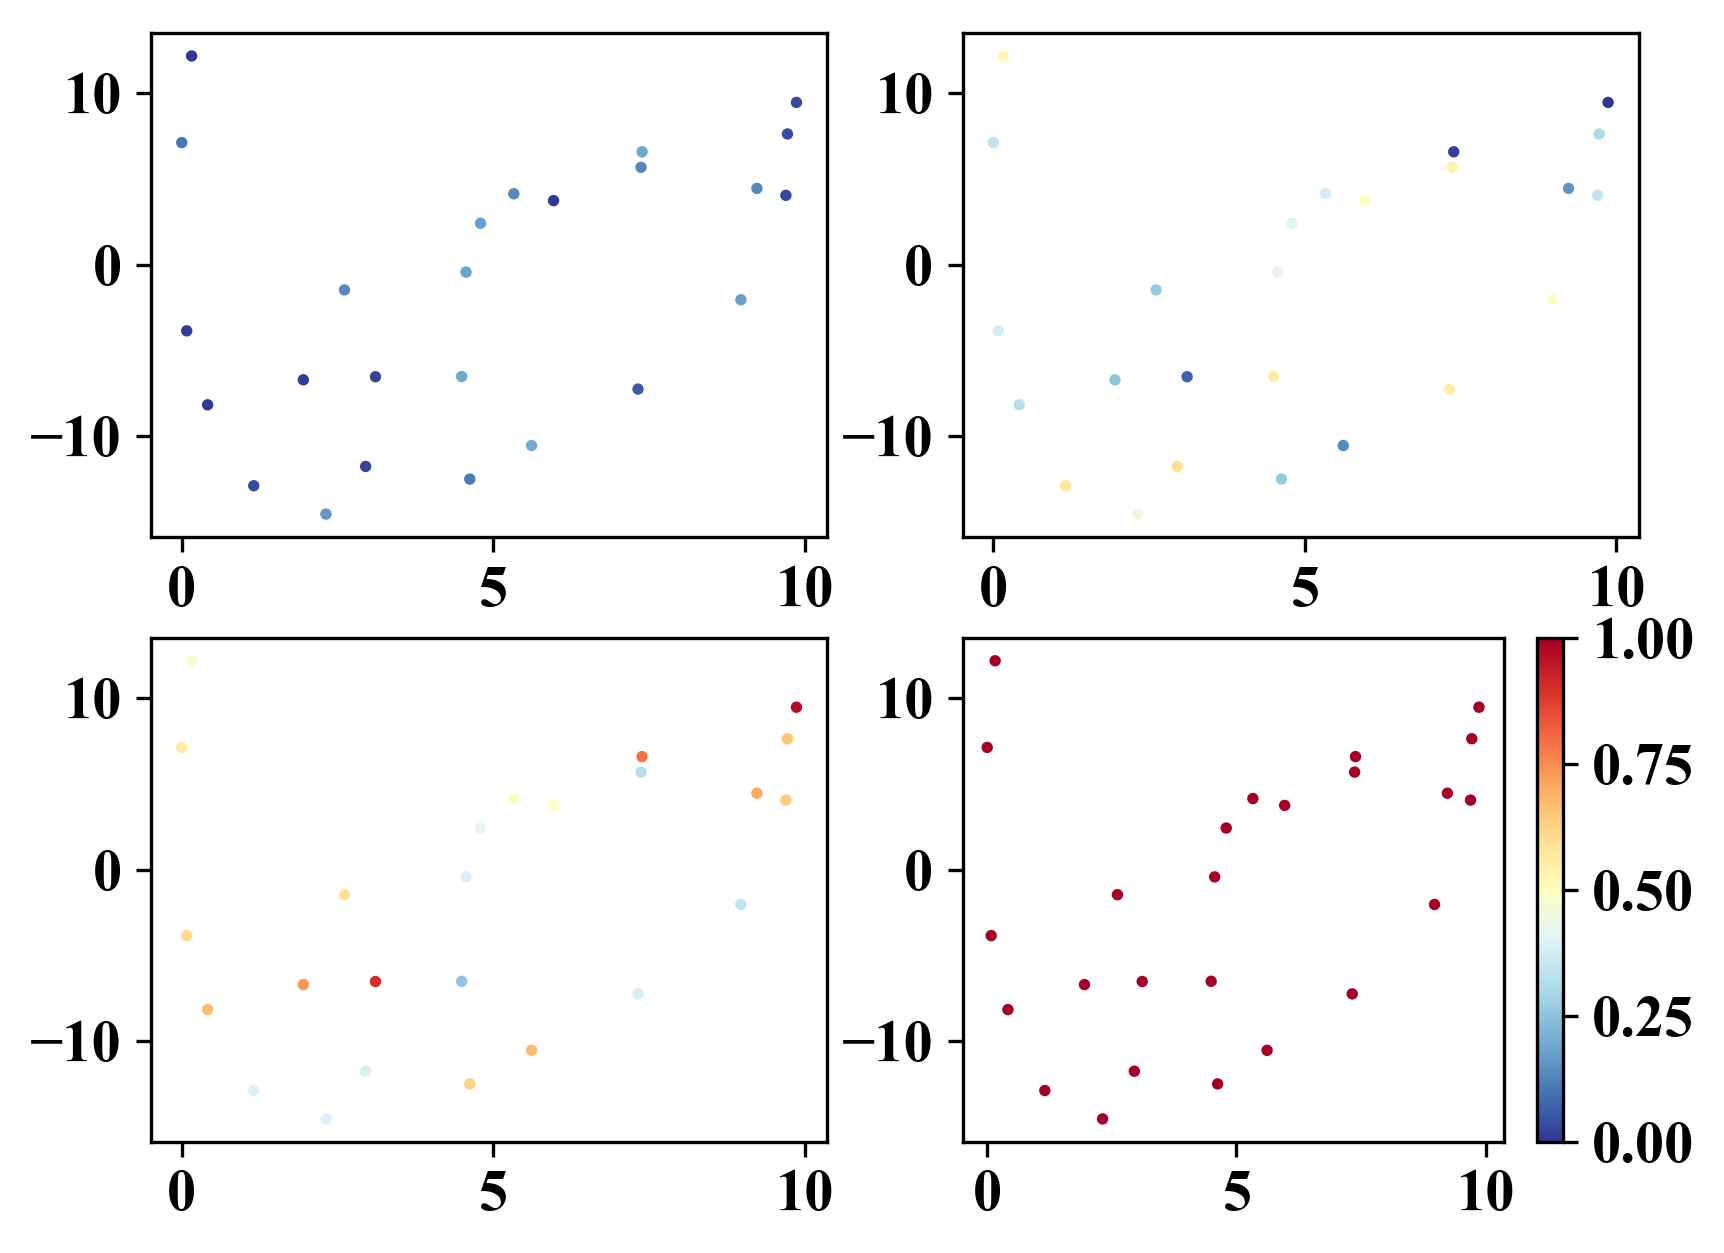

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa1e15c9050>

In [169]:
figure
subplot(221)
scatter(xx, yy, s=3, c=field1, vmin=0, vmax=1, cmap=ColorMap("RdYlBu_r"))
subplot(222)
scatter(xx, yy, s=3, c=field2, vmin=0, vmax=1, cmap=ColorMap("RdYlBu_r"))
subplot(223)
scatter(xx, yy, s=3, c=field3, vmin=0, vmax=1, cmap=ColorMap("RdYlBu_r"))
subplot(224)
sc = scatter(xx, yy, s=3, c=field3+field2+field1, vmin=0, vmax=1, cmap=ColorMap("RdYlBu_r"))
colorbar(sc)

In [184]:
mask = trues(size(xxi));
pm = ones(size(xxi)) / (xxi[2,1,1] - xxi[1,1,1]);
pn = ones(size(xxi)) / (yyi[1,2,1] - yyi[1,1,1]);
pq = ones(size(xxi)) / (zzi[1,1,2] - zzi[1,1,1]);

# correlation length: set to zero for the last dimension
sz = size(mask);
lenx = fill(200.,sz)   # 100 km
leny = fill(200.,sz)   # 100 km
lenz = zeros(sz);      # 25 m 
len = (lenx, leny, lenz);

# obs. error variance normalized by the background error variance
epsilon2 = 0.01;

In [185]:
# fi is the interpolated field
fi,s = DIVAndrun(mask,(pm,pn,pq), (xxi, yyi, zzi),(xx2,yy2,zz2),field123,len,epsilon2);

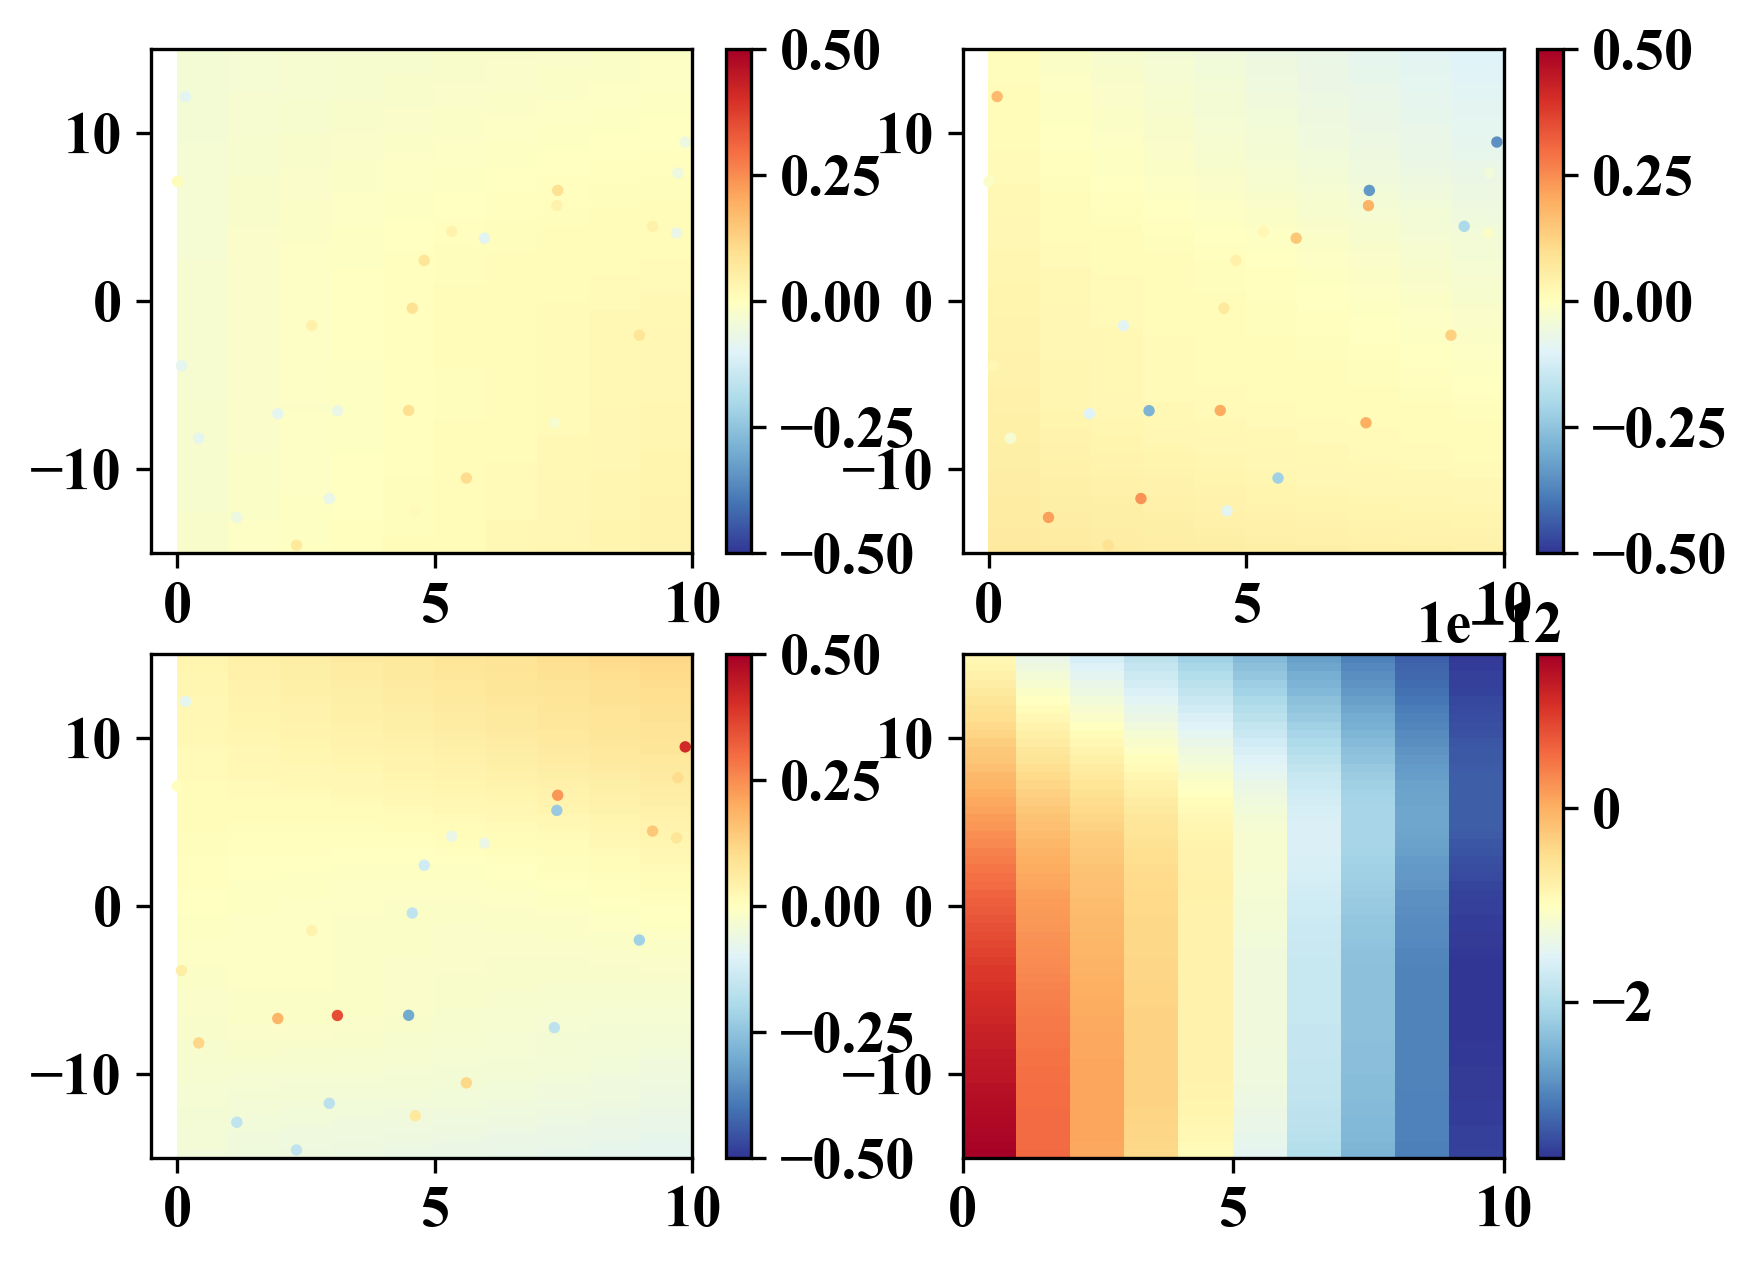

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa1de096990>

In [205]:
figure
subplot(221)
pcolormesh(xxi[:,:,1], yyi[:,:,1], fi[:,:,1], vmin=-.5, vmax=.5, cmap=ColorMap("RdYlBu_r"))
scatter(xx, yy, s=3, c=field1 .- mean(field1), vmin=-.5, vmax=.5, cmap=ColorMap("RdYlBu_r"))

colorbar()
subplot(222)
pcolormesh(xxi[:,:,1], yyi[:,:,1], fi[:,:,2], vmin=-.5, vmax=.5, cmap=ColorMap("RdYlBu_r"))
scatter(xx, yy, s=3, c=field2 .- mean(field2), vmin=-.5, vmax=.5, cmap=ColorMap("RdYlBu_r"))

colorbar()
subplot(223)
pcolormesh(xxi[:,:,1], yyi[:,:,1], fi[:,:,3], vmin=-.5, vmax=.5, cmap=ColorMap("RdYlBu_r"))
scatter(xx, yy, s=3, c=field3 .- mean(field3), vmin=-.5, vmax=.5, cmap=ColorMap("RdYlBu_r"))
colorbar()
subplot(224)
#sc = scatter(xx, yy, s=3, c=field3+field2+field1, vmin=0, vmax=1, cmap=ColorMap("RdYlBu_r"))
pcolormesh(xxi[:,:,1], yyi[:,:,1], sum(fi, dims=3)[:,:,1], cmap=ColorMap("RdYlBu_r"))
colorbar()

In [206]:
mean(field1) + mean(field2) + mean(field3)

1.0

In [218]:
# fi is the interpolated field
fi3,s = DIVAndrun(mask,(pm,pn,pq), (xxi, yyi, zzi),(xx2,yy2,zz2),field123,len,epsilon2; 
    epsilon2forfractions=0.);

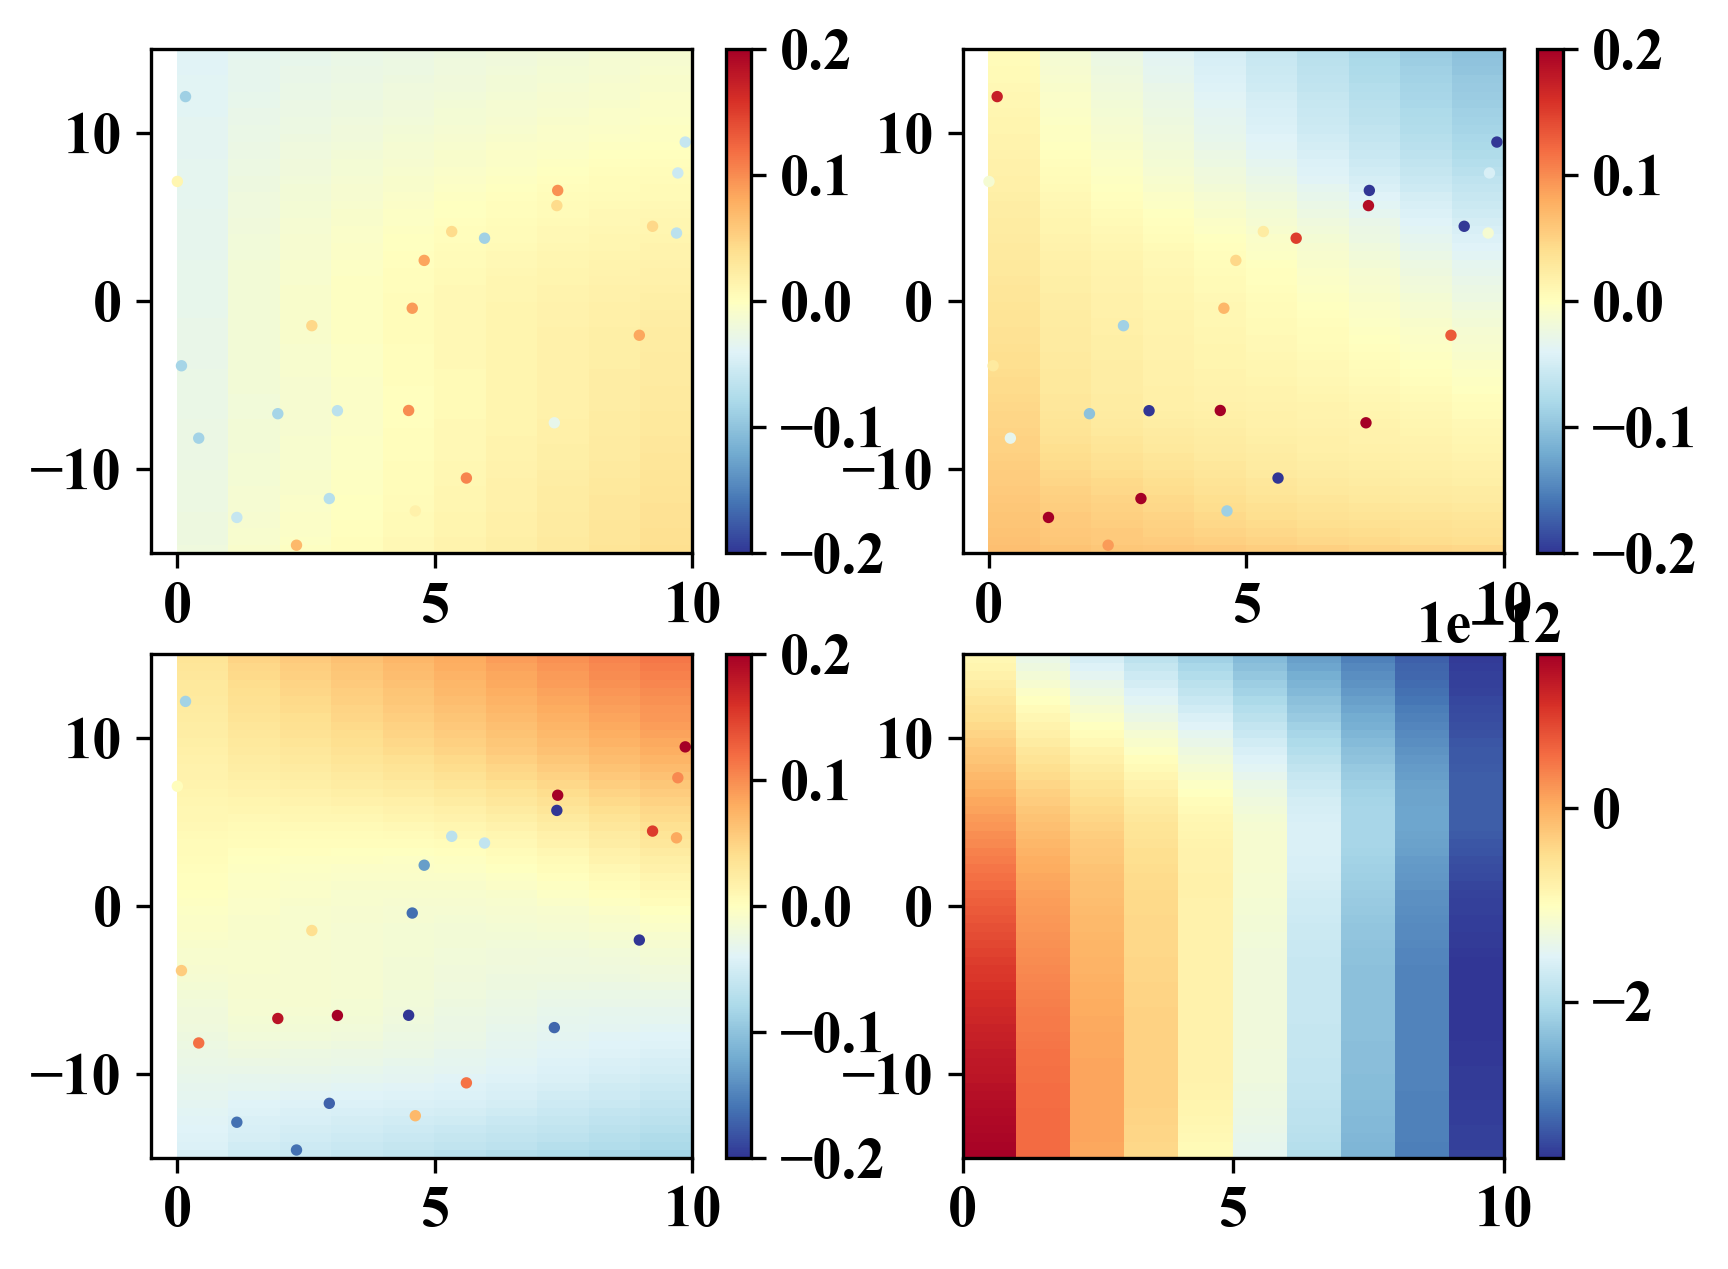

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa1dda7d250>

In [219]:
vvmin = -0.2
vvmax = 0.2
figure()

subplot(221)
pcolormesh(xxi[:,:,1], yyi[:,:,1], fi3[:,:,1], vmin=vvmin, vmax=vvmax, cmap=ColorMap("RdYlBu_r"))
scatter(xx, yy, s=3, c=field1 .- mean(field1), vmin=vvmin, vmax=vvmax, cmap=ColorMap("RdYlBu_r"))

colorbar()
subplot(222)
pcolormesh(xxi[:,:,1], yyi[:,:,1], fi3[:,:,2], vmin=vvmin, vmax=vvmax, cmap=ColorMap("RdYlBu_r"))
scatter(xx, yy, s=3, c=field2 .- mean(field2), vmin=vvmin, vmax=vvmax, cmap=ColorMap("RdYlBu_r"))

colorbar()
subplot(223)
pcolormesh(xxi[:,:,1], yyi[:,:,1], fi3[:,:,3], vmin=vvmin, vmax=vvmax, cmap=ColorMap("RdYlBu_r"))
scatter(xx, yy, s=3, c=field3 .- mean(field3), vmin=vvmin, vmax=vvmax, cmap=ColorMap("RdYlBu_r"))
colorbar()
subplot(224)
#sc = scatter(xx, yy, s=3, c=field3+field2+field1, vmin=0, vmax=1, cmap=ColorMap("RdYlBu_r"))
pcolormesh(xxi[:,:,1], yyi[:,:,1], sum(fi3, dims=3)[:,:,1], cmap=ColorMap("RdYlBu_r"))
colorbar()

In [209]:
mean(sum(fi3, dims=3)[:,:,1])

1.010732728291895e-13

In [210]:
mean(sum(fi, dims=3)[:,:,1])

-1.6754028358993592e-12

In [216]:
fi[:,:,1] - fi3[:,:,1]

11×61 Array{Float64,2}:
 -1.58187e-11  -1.71705e-11  -1.78476e-11  …  -5.40949e-11  -5.52218e-11
 -4.23078e-12  -5.70376e-12  -6.43453e-12     -4.32515e-11  -4.48103e-11
  1.58901e-12   3.66755e-14  -7.30732e-13     -3.79002e-11  -3.95854e-11
  7.41845e-12   5.78507e-12   4.97718e-12     -3.26138e-11  -3.43573e-11
  1.32558e-11   1.15548e-11   1.07117e-11     -2.73668e-11  -2.91287e-11
  1.90991e-11   1.73606e-11   1.64978e-11  …  -2.21431e-11  -2.39017e-11
  2.49462e-11   2.32113e-11   2.23502e-11     -1.69345e-11  -1.86784e-11
  3.07945e-11   2.90996e-11   2.82576e-11     -1.1737e-11   -1.34605e-11
  3.66413e-11   3.50153e-11   3.42063e-11     -6.54919e-12  -8.24982e-12
  4.24836e-11   4.09488e-11   4.01835e-11     -1.37156e-12  -3.04792e-12
  5.41233e-11   5.28023e-11   5.21394e-11  …   8.93345e-12   7.30943e-12

In [212]:
fi3[:,:,1]

11×61 Array{Float64,2}:
 -0.0214821   -0.0221595   -0.0224978   …  -0.0381888   -0.0387808 
 -0.00920938  -0.0103023   -0.0108994      -0.0330788   -0.0339219 
 -0.00305003  -0.00414424  -0.00480808     -0.0304316   -0.031481  
  0.00311248   0.00198711   0.00133939     -0.0277479   -0.0290357 
  0.00927498   0.0081561    0.00756845     -0.0250771   -0.026587  
  0.015435     0.0143753    0.0138415   …  -0.0224454   -0.0241364 
  0.0215899    0.0205608    0.0200492      -0.01986     -0.021685  
  0.0277376    0.0266714    0.0261405      -0.0173146   -0.019234  
  0.0338759    0.0327066    0.0321216      -0.0147942   -0.0167846 
  0.040003     0.0386827    0.0380205      -0.0122823   -0.0143378 
  0.0522015    0.0505216    0.0496789   …  -0.00726961  -0.00946398